Phase 3 Project

SyriaTel Customer Churn

Introduction


Overview

The telecommunication industry plays a crucial role in daily lives, with media transmission being a standout amongst the most developing sectors. Operators need to find and execute new methods to remain at the forefront of this growth.

While acquiring new customers is important, telecommunication companies recognize that retaining existing ones is even more crucial. Customer churn, defined as the rate at which subscribers switch to competitors, is a major concern in this industry. Statistics show a 2.2% monthly churn rate, leading to an annual customer loss of around 27% in the wireless sector.

Customer churn prediction or churn analysis involves using data mining techniques to identify patterns in customer data that can predict churn. Techniques like hybrid models, decision trees, and Bayesian applications have been employed to address this challenge. This study focuses on developing a hybrid predictive model for churn prediction and feature selection, enabling service providers to predict customer churn propensity and eliminate reliance on traditional methods like questionnaires.

The project is structured as follows:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis
5. Modelling
6. Model Evaluation
7. Recommendations and Conclusions

1. Business Understanding

Business problem

Customer churn, defined as the rate at which subscribers switch from one service provider to another, poses a significant challenge for telecommunication companies. The wireless sector, for example, experiences a monthly churn rate of 2.2%, resulting in an annual loss of approximately 27% of customers. To address this issue, there is a need for effective churn prediction and retention strategies.

Objective:

The objective of this project is to develop a hybrid predictive model for churn prediction and feature selection in the telecommunication industry. By leveraging data mining techniques, the aim is to identify patterns in customer data that can accurately predict churn behavior. The ultimate goal is to enable service providers to proactively identify customers at risk of churn and implement targeted retention strategies to mitigate customer loss.



2. Data Understanding

The dataset titled "Churn in Telecom" sourced from Kaggle provides details on customer activity, specifically whether they have terminated their subscription with the telecom company. The primary aim of this dataset is to construct predictive models that aid the telecom industry in minimizing financial losses attributed to short-term customer retention. 

Data understanding is dedicated to familiarizing ourselves with the dataset and identifying potential data quality issues. Additionally, initial exploratory data analysis will be conducted to uncover initial insights into the dataset's characteristics.

In [1]:
# Import modules and Packages

# Data Handling and Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Filter future Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Load the data into panda dataframe
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Previewing the first few rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Number of Rows and Columns
df.shape

(3333, 21)

In [4]:
# Number of Elements in Dataframe
df.size

69993

In [5]:
# General Overview of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

This dataset comprises 3333 data records and 21 columns. However, a thorough examination of each column is necessary to detect anomalies, particularly those in the form of placeholder values or unique characters. 

Among the columns, four (4) are categorized as objects, eight (8) as integers, eight (8) as floats, and one (1) as boolean. The column designated as "churn" serves as our target variable, while the remaining columns are treated as features. This dataset offers a diverse range of information, encompassing customer demographics, service plans, call metrics, and churn indicators.

Based on the general information provided above, it is observed that the majority of column names consist of two or more words. To enhance accessibility, it is imperative to eliminate the white spaces within the column names. Thus, we must proceed with renaming the columns by replacing white spaces with underscores '_' for improved readability and usability.

In [6]:
# Rename column titles to remove spaces
cols = []
for col in df.columns:
    col = col.replace(' ', '_')
    cols.append(col)

# Update DataFrame columns with modified column names
df.columns = cols
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [7]:
# Numerical Columns
print(f"Numerical Columns: {df.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')


In [8]:
# General statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area_code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Summary of Features in the Datset

- State: The state the customer lives in
- Account Length: The number of days the customer has had an account.
- Area Code: The area code of the customer
- Phone Number: The phone number of the customer
- International Plan: True if the customer has the international plan, otherwise false.
- Voice Mail Plan: True if the customer has the voice mail plan, otherwise false.
- Number Vmail Messages: the number of voicemails the customer has sent.
- Total Day Minutes: total number of minutes the customer has been in calls during the day.
- Total Day Calls: total number of calls the user has done during the day.
- Total Day Charge: total amount of money the customer was charged by the Telecom company for calls during the day.
- Total Eve Minutes: total number of minutes the customer has been in calls during the evening.
- Total Eve Calls: total number of calls the customer has done during the evening.
- Total Eve Charge: total amount of money the customer was charged by the Telecom company for calls during the evening.
- Total Night Minutes: total number of minutes the customer has been in calls during the night.
- Total Night Calls: total number of calls the customer has done during the night.
- Total Night Charge: total amount of money the customer was charged by the Telecom company for calls during the night.
- Total Intl Minutes: total number of minutes the user has been in international calls.
- Total Intl Calls: total number of international calls the customer has done.
- Total Intl Charge: total amount of money the customer was charged by the Telecom company for international calls.
- Customer Service Calls: number of calls the customer has made to customer service.
- Churn: true if the customer terminated their contract, otherwise false

3. Data Cleaning

We will examine the dataframe for any anomalies. It's essential to thoroughly analyze the data to identify missing values, including placeholder or distinct values.

In [9]:
# Check for missing values (nan) in the dataframe
df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [10]:
# Check for duplicates in the dataframe
df.duplicated().sum()

0

Given the information provided, it's clear that our dataset lacks any null values or any duplicates, making the need for an imputer unnecessary.

Some columns within the dataset lack meaningful insights into customer behavior, such as the phone number column. Predicting customer churn does not require consideration of phone numbers, rendering this column irrelevant.

In [11]:
# Drop the column labeled "phone number" from the DataFrame.
df.drop(['phone_number'], axis=1, inplace=True)

4. Exploratory Data Analysis

4.1 Univariate Analysis

In [12]:
import plotly.graph_objects as go
#plotting the target variable distribution
class_counts = df.groupby("churn").size()

# Create a bar chart of the value counts using Plotly
fig = go.Figure(
    data=[go.Bar(x=class_counts.index, y=class_counts.values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), 
          hovermode = 'closest',width=600)
)

# Show the chart
fig.show()

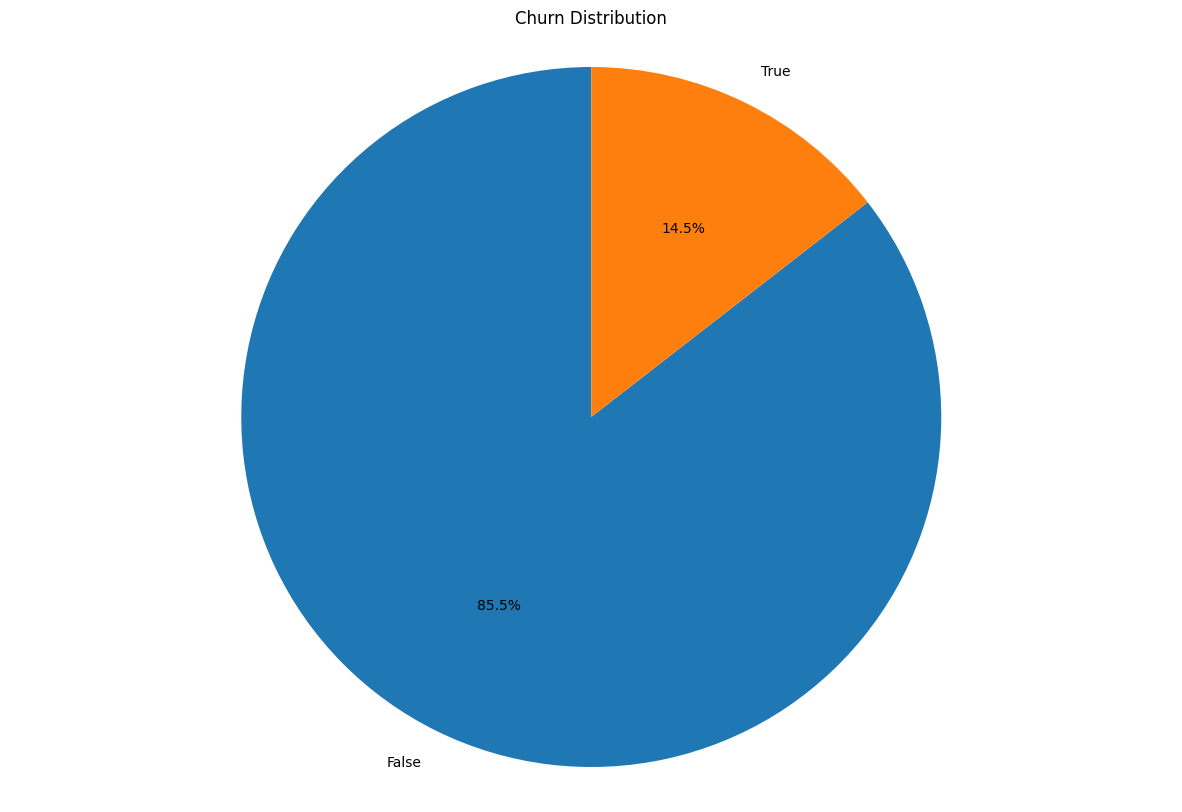

In [13]:
# representing the same using a Pie Chart to visualize the percentages
churn_counts = df['churn'].value_counts()

# Create a new figure with a larger size
plt.figure(figsize=(15, 10))

# Create a pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

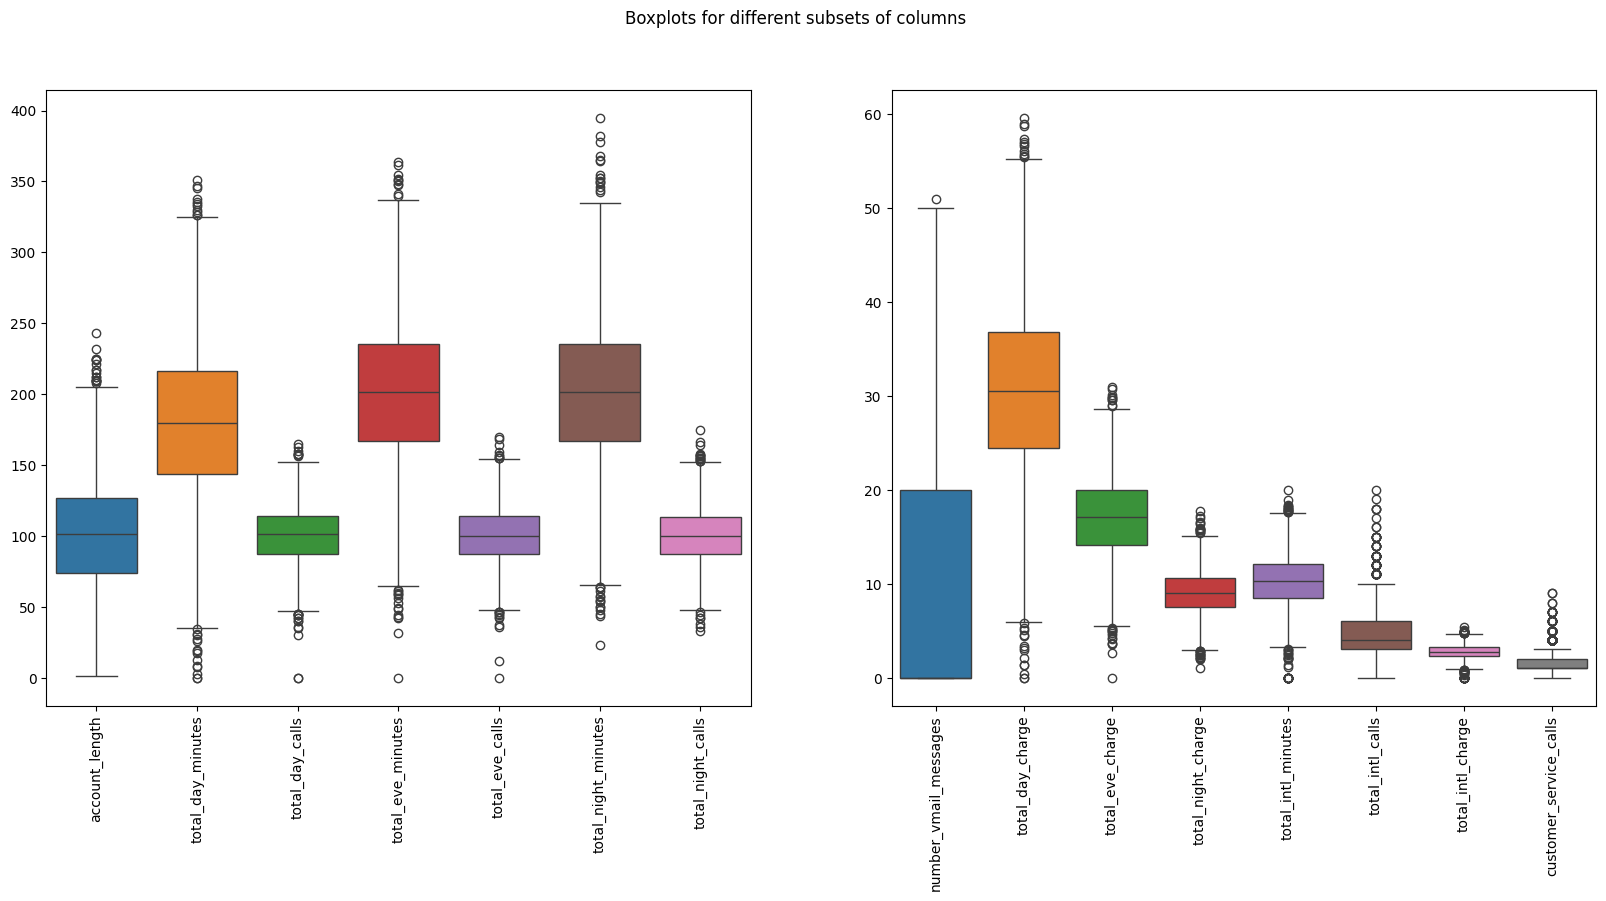

In [14]:
#Checking for outliers in the data
# List of columns for the first boxplot
cols1 = ['account_length','total_day_minutes','total_day_calls',
                'total_eve_minutes','total_eve_calls','total_night_minutes','total_night_calls']

# List of columns for the second boxplot
cols2 = ['number_vmail_messages', 'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create a boxplot for the first subset of columns in the first column
sns.boxplot(data=df[cols1], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Create a boxplot for the second subset of columns in the second column
sns.boxplot(data=df[cols2], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

#setting the figure title
fig.suptitle('Boxplots for different subsets of columns')

# Show the plot
plt.show()

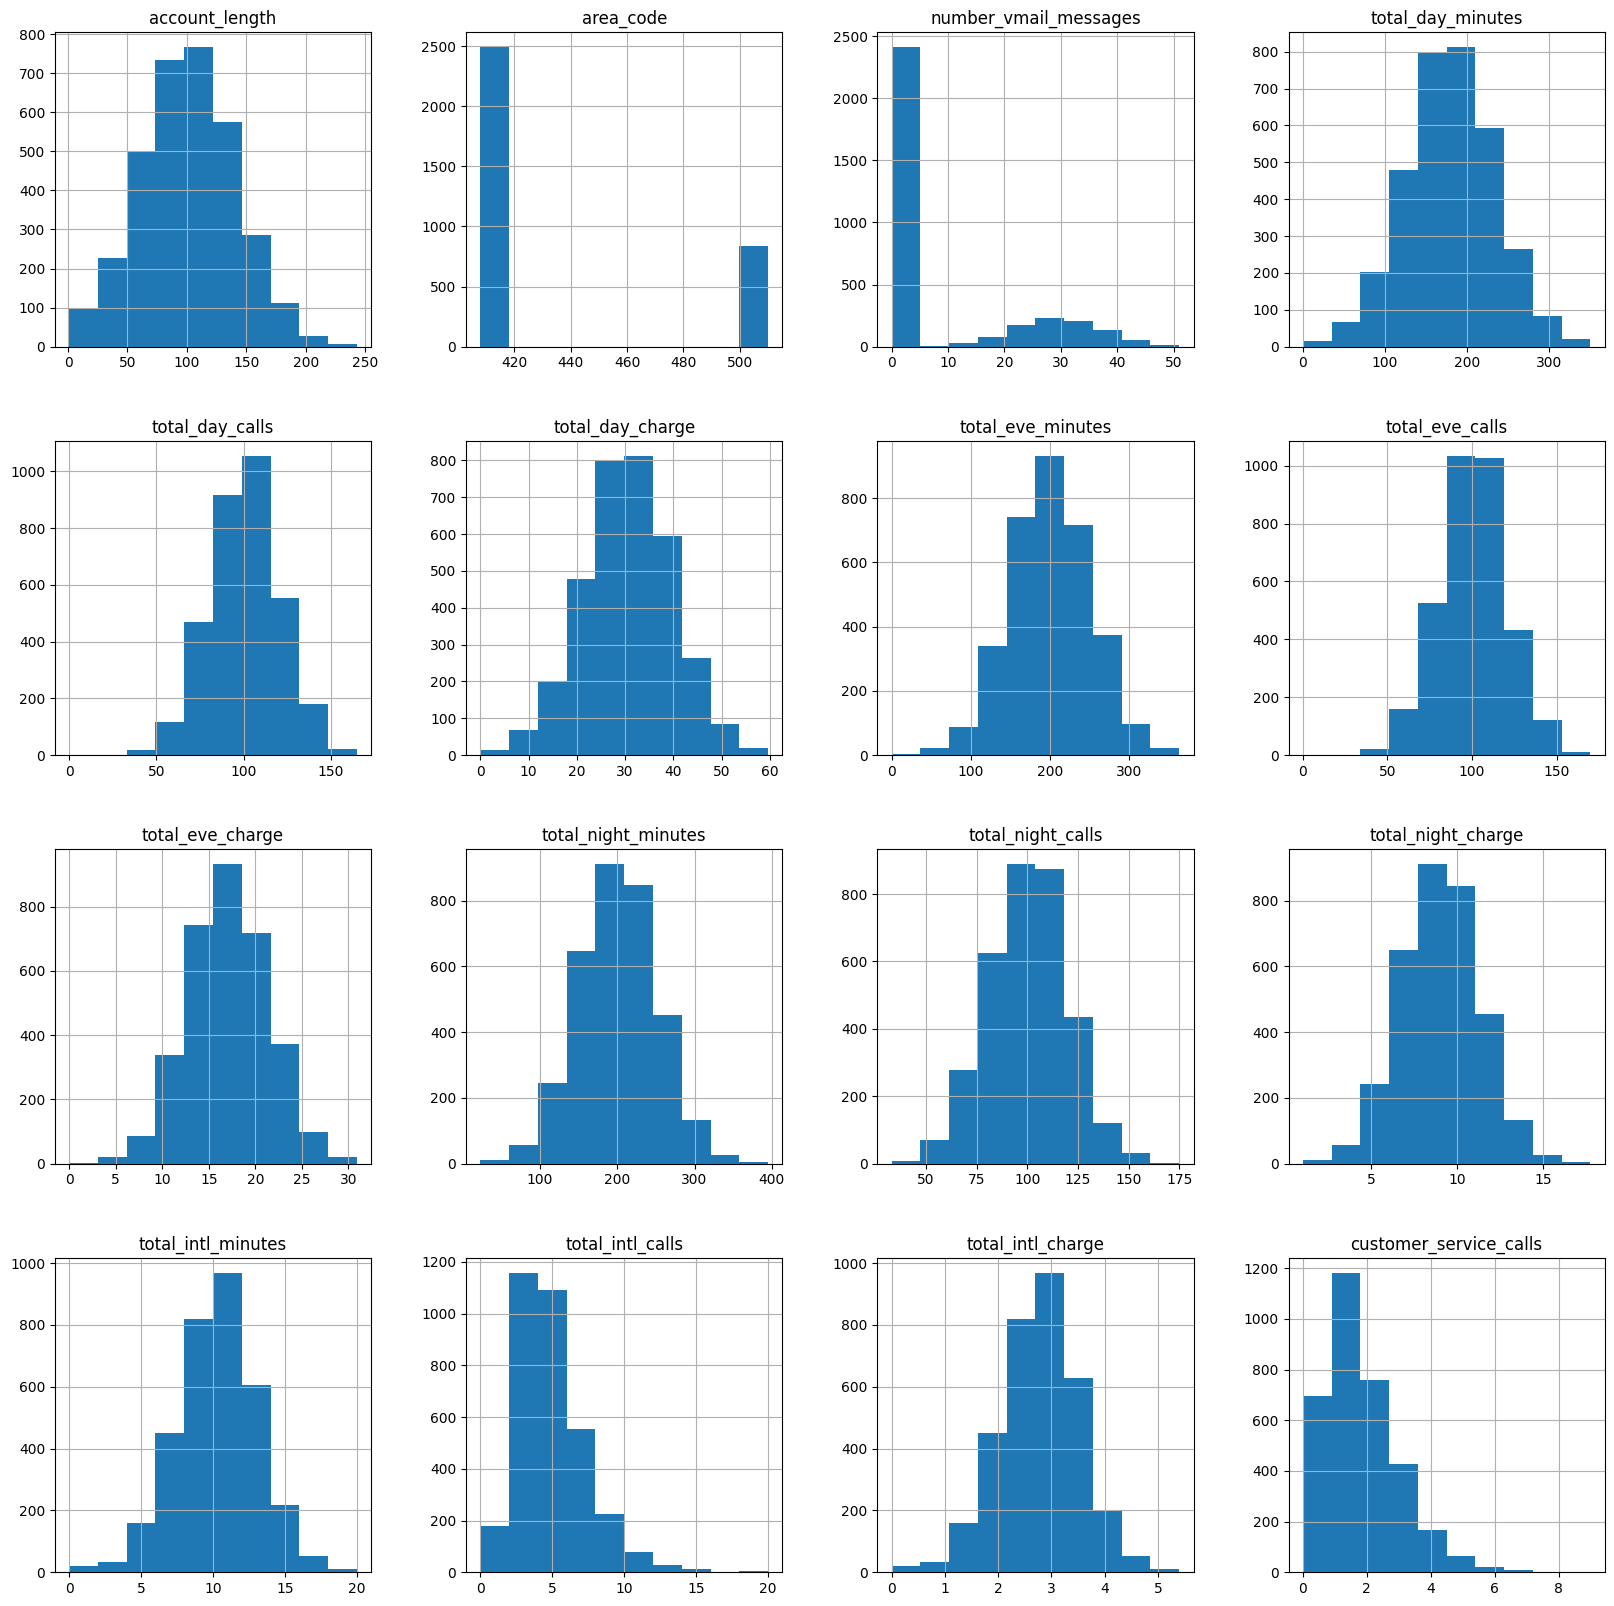

In [15]:
# distribution of numerical predictors
df.hist(figsize=(20,20));

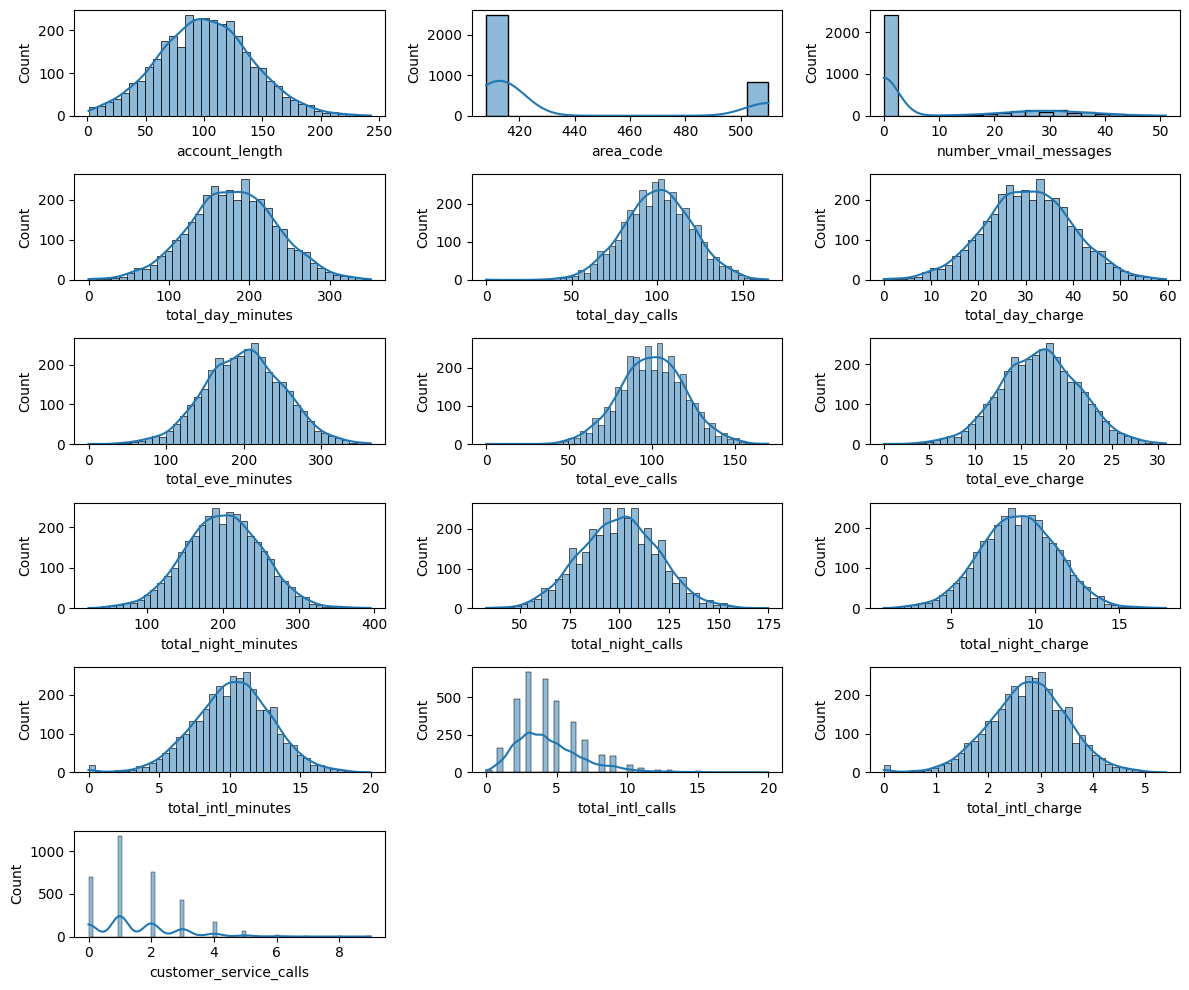

In [16]:
# Get the numeric columns using select_dtypes
numeric_columns = df.select_dtypes(include='number').columns
numeric_features = list(numeric_columns)

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


Bivariate Analysis

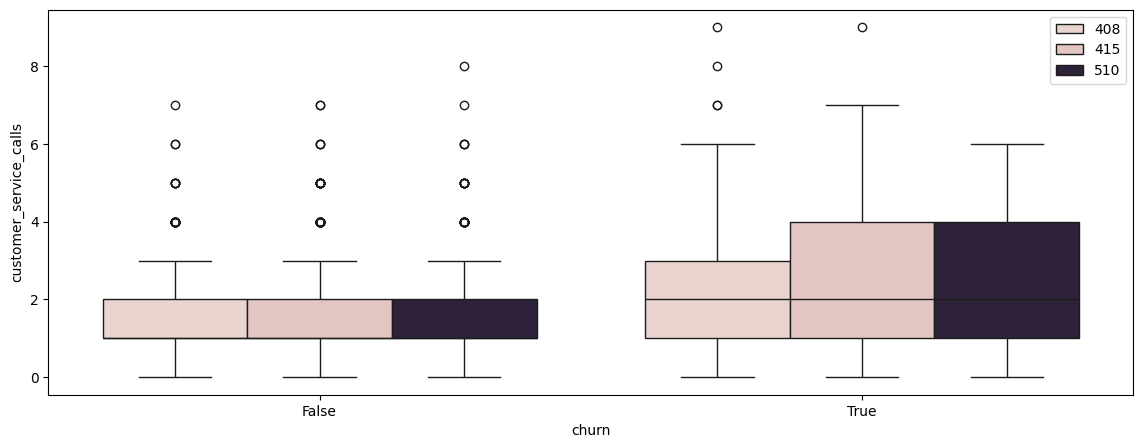

In [17]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='churn',y='customer_service_calls',hue='area_code');
plt.legend(loc='upper right');

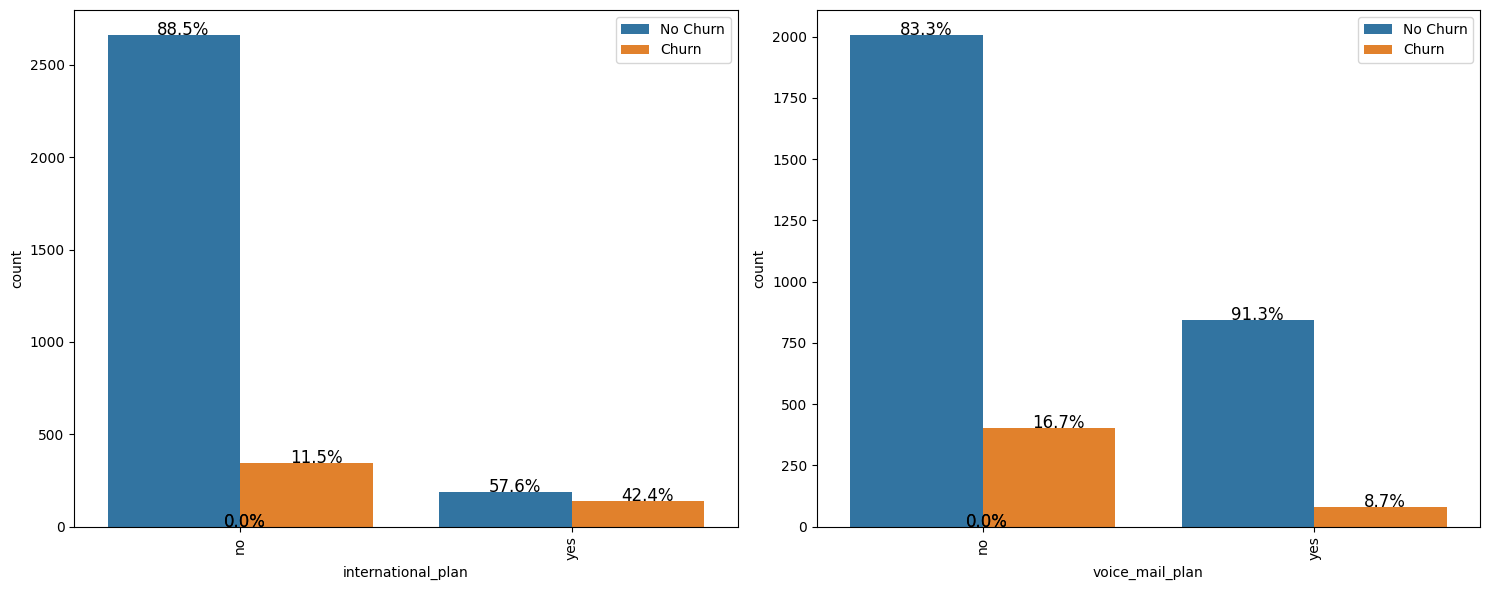

In [18]:
categoric_cols = ['international_plan','voice_mail_plan']

fig, axes = plt.subplots(nrows=1, ncols=len(categoric_cols), figsize=(15, 6))

for i, col in enumerate(categoric_cols):
    ax = sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index, ax=axes[i])
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles, ['No Churn', 'Churn'], loc="upper right")

    # Calculate the total number of observations within each group
    totals = df.groupby(col)["churn"].count().values

    # Iterate over the rectangles in the plot
    for j, p in enumerate(ax.patches):
        # Calculate the percentage of observations in each group
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals[j % 2])
        # Add text annotations with the calculated percentages
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

plt.tight_layout()
plt.show()

In [19]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

State

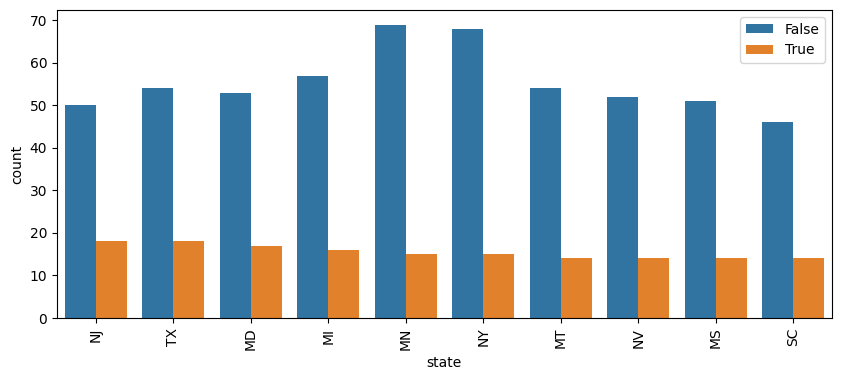

In [20]:

plot_categorical_distribution(df, 'state')

International Plan

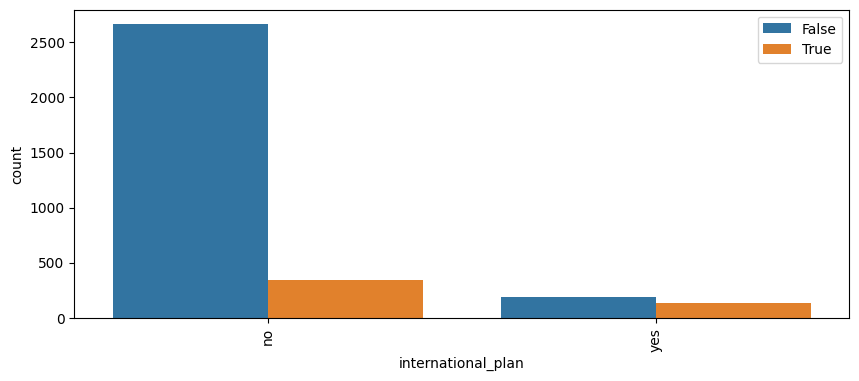

In [21]:
plot_categorical_distribution(df, 'international_plan')

Multicollinearity

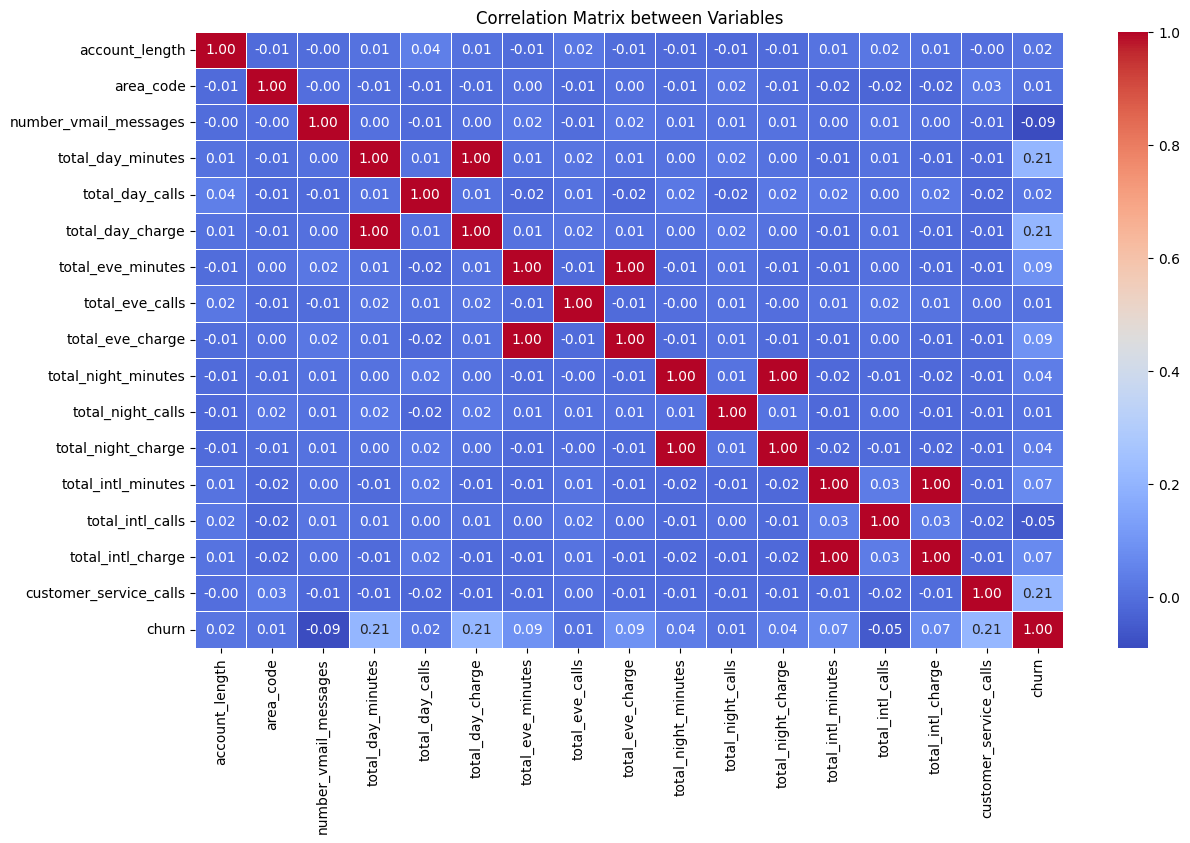

In [22]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the correlation heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between Variables')
plt.show()

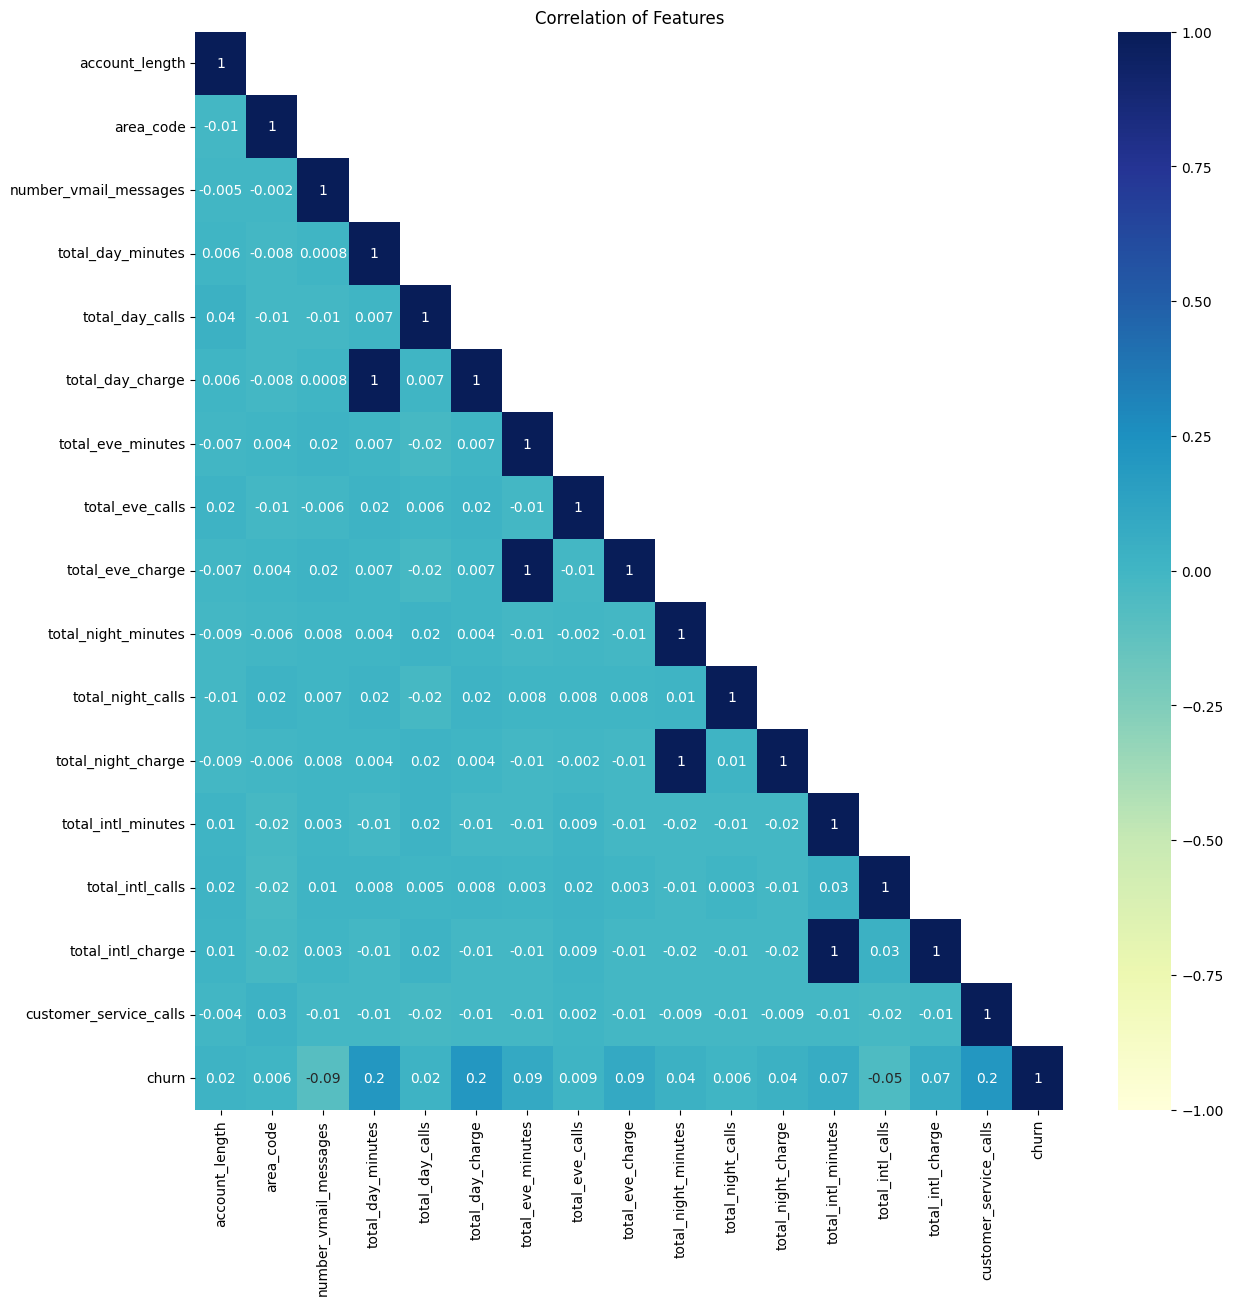

In [23]:
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(14,14))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    corr_tri = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

    sns.heatmap(data=corr_tri, center=0, cmap="YlGnBu", annot=True, fmt='.1g', vmin=-1)
    plt.title('Correlation of Features')
    plt.show()
corrmatrix(df)

In [24]:
df1=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df1['pairs'] = list(zip(df1.level_0, df1.level_1))

# set index to pairs
df1.set_index(['pairs'], inplace = True)

#d rop level columns
df1.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df1.columns = ['cc']

# drop duplicates. This could be dangerous i
df1[(df1.cc>.75) & (df1.cc <1)]

,cc
pairs,
"(total_day_charge, total_day_minutes)",1.000000
"(total_day_minutes, total_day_charge)",1.000000
"(total_eve_minutes, total_eve_charge)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_night_charge, total_night_minutes)",0.999999
"(total_intl_charge, total_intl_minutes)",0.999993
"(total_intl_minutes, total_intl_charge)",0.999993


Feature Engineering

Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

One Hot Encoding

In [26]:
df = pd.get_dummies(df,columns = ['state', 'area_code','international_plan','voice_mail_plan'])
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0


Scaling the data

In [27]:
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


Modeling

In [28]:
#Defining X and y
X = df.drop("churn", axis=1)
y = df["churn"]

In [29]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [30]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

Logistic Regression

In [31]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

In [32]:
# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

In [33]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

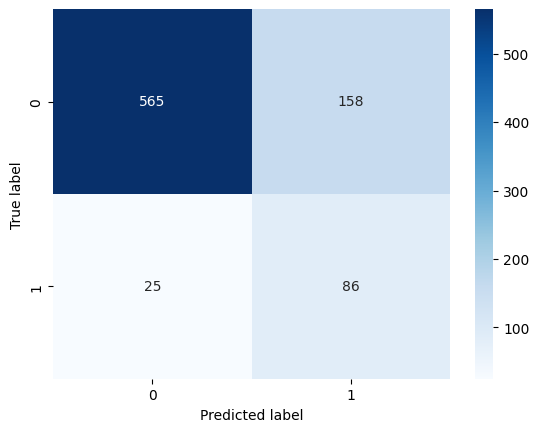

In [34]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [35]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86       723
         1.0       0.35      0.77      0.48       111

    accuracy                           0.78       834
   macro avg       0.66      0.78      0.67       834
weighted avg       0.88      0.78      0.81       834



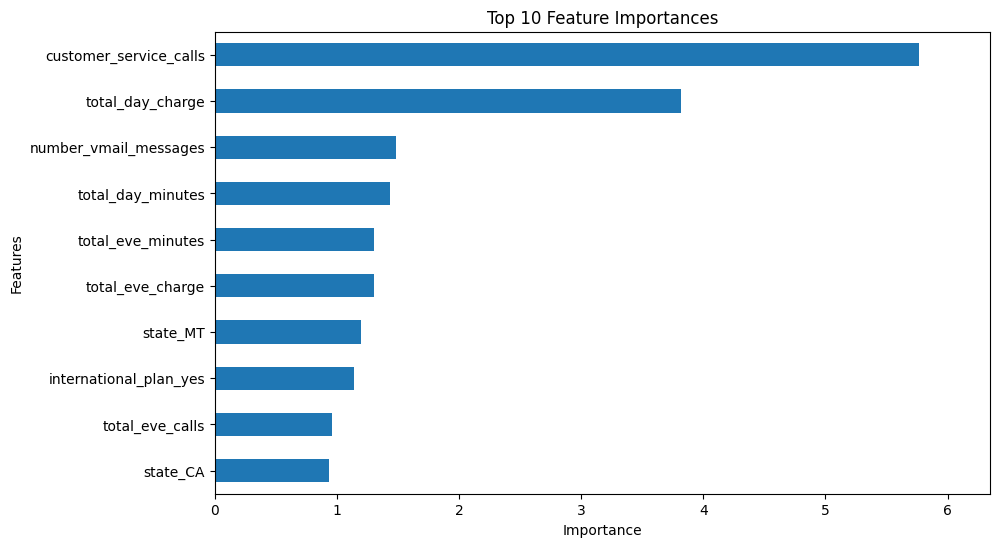

In [36]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

Decision Tree Classifier

In [37]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

In [38]:
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

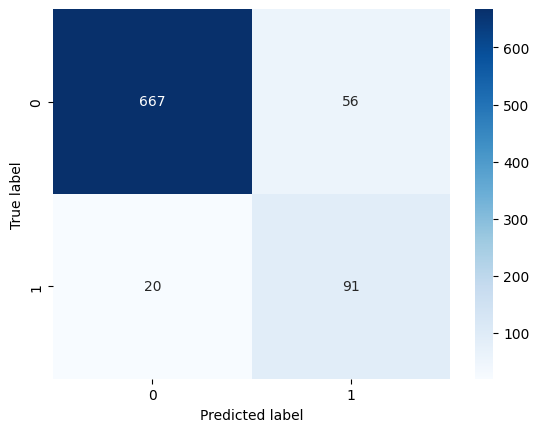

In [39]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [40]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       723
         1.0       0.62      0.82      0.71       111

    accuracy                           0.91       834
   macro avg       0.79      0.87      0.83       834
weighted avg       0.92      0.91      0.91       834



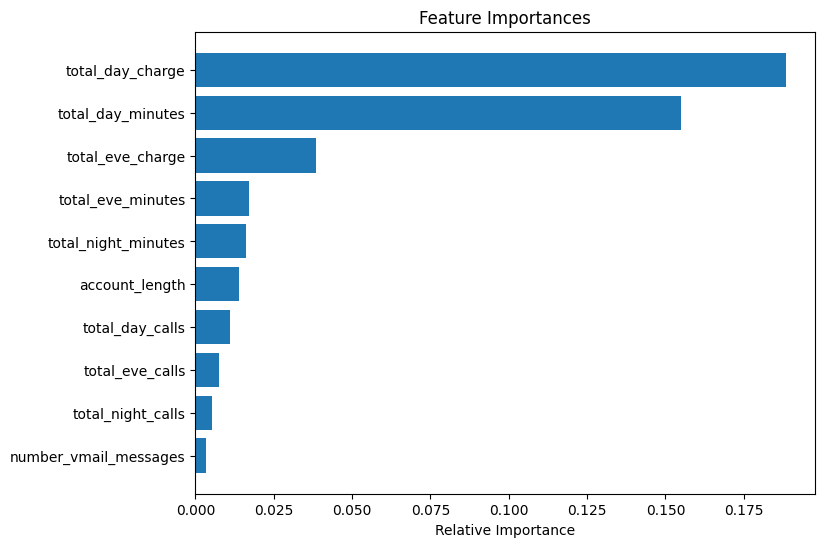

In [41]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Random Forest Classifier

In [42]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [43]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

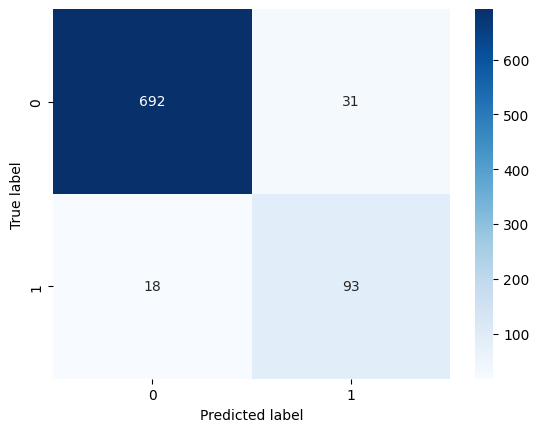

In [44]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [45]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       723
         1.0       0.75      0.84      0.79       111

    accuracy                           0.94       834
   macro avg       0.86      0.90      0.88       834
weighted avg       0.94      0.94      0.94       834



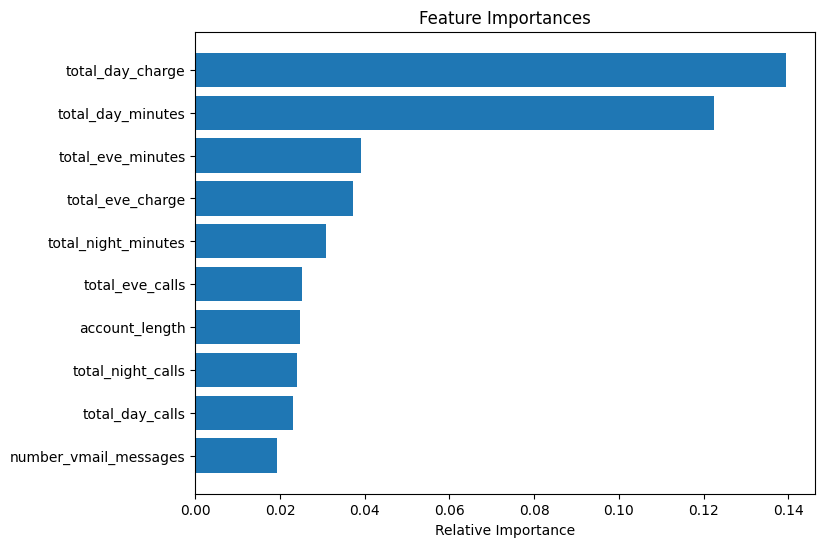

In [46]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

XGBoost

In [47]:
from xgboost import XGBClassifier

In [48]:
#instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=123)

#Fit on the training data
xg_clf.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [49]:
#predict on the test data
y_pred_xg = xg_clf.predict(X_test)

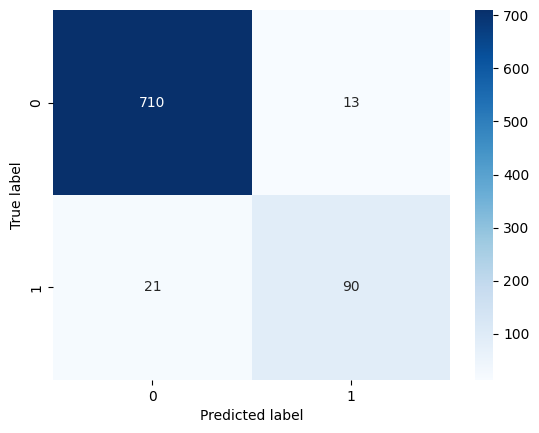

In [50]:
plot_confusion_matrix(y_test, y_pred_xg, [0,1])

In [51]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       723
         1.0       0.87      0.81      0.84       111

    accuracy                           0.96       834
   macro avg       0.92      0.90      0.91       834
weighted avg       0.96      0.96      0.96       834



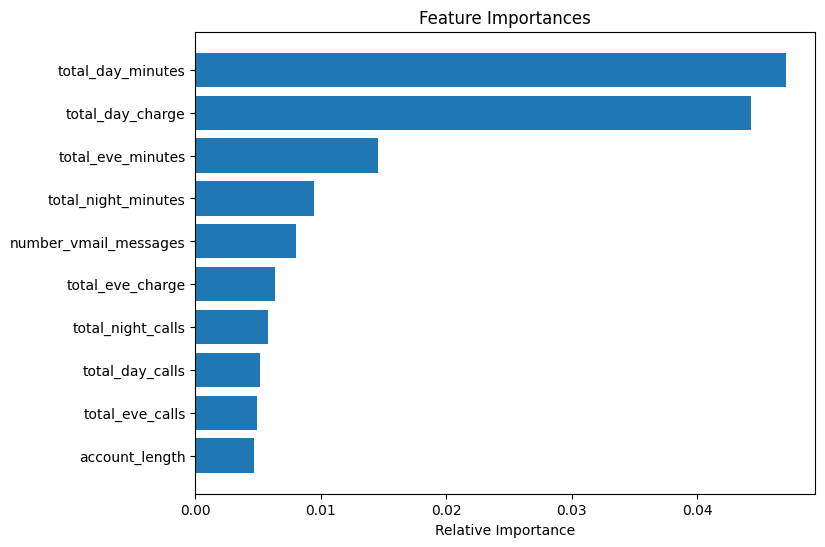

In [52]:
feature_names = list(resampled_X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Model Evaluation

In [53]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table


,recall
classifiers,
LogisticRegression,0.774775
RandomForestClassifier,0.837838
DecisionTreeClassifier,0.801802
XGBClassifier,0.810811
